In [1]:
from pathlib import Path
from pandas.plotting import scatter_matrix

%matplotlib inline
import numpy as np
import datetime
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
from sklearn.datasets import make_blobs
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import preprocessing
from sklearn import utils
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 100)

In [2]:
"""
Python for Finance: Mastering data driven finance.
Chapter 12 - Stochastics

This chapter introduces 

"Random Numbers"
Pseudo-random numbers build basis for all simulation efforts.

"Simulation"
In finance two simulation taks are of importance: simulation of random variables and stochastic prosesses.

"Valuation"
Two main disiplines when it comes to valuation are valuation with Euro exercise and US exercise
also Bermudan exercise(a finite set of spefific dates)

"Risk Measuers"
Simulation lends well to the calculation of risk like[value at risk, credit value-at-risk and credit valuation adjustments]
"""
cash_flow = pd.read_csv('us-cashflow-annual.csv',infer_datetime_format=True, parse_dates=True, delimiter=';')
cash_flow.rename(columns={'Report Date':'Date'}, inplace=True)

In [3]:
cash_flow.set_index(['Ticker','Date'], inplace=True)

cash_flow.shape

(19238, 26)

In [4]:
cash_flow = cash_flow.fillna(0)

In [5]:
import math 
import numpy as np 
import numpy.random as npr
from pylab import plt, mpl

plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline


# Random Numbers 


npr.seed(100)
np.set_printoptions(precision=4)

In [6]:
npr.rand(10)

array([0.5434, 0.2784, 0.4245, 0.8448, 0.0047, 0.1216, 0.6707, 0.8259,
       0.1367, 0.5751])

In [7]:
npr.rand(10, 5)

array([[0.8913, 0.2092, 0.1853, 0.1084, 0.2197],
       [0.9786, 0.8117, 0.1719, 0.8162, 0.2741],
       [0.4317, 0.94  , 0.8176, 0.3361, 0.1754],
       [0.3728, 0.0057, 0.2524, 0.7957, 0.0153],
       [0.5988, 0.6038, 0.1051, 0.3819, 0.0365],
       [0.8904, 0.9809, 0.0599, 0.8905, 0.5769],
       [0.7425, 0.6302, 0.5818, 0.0204, 0.21  ],
       [0.5447, 0.7691, 0.2507, 0.2859, 0.8524],
       [0.975 , 0.8849, 0.3595, 0.5989, 0.3548],
       [0.3402, 0.1781, 0.2377, 0.0449, 0.5054]])

In [8]:
a = 5
b = 10

npr.rand(10) * (b - a) + a

array([6.8813, 7.964 , 8.1497, 5.713 , 9.6692, 9.7319, 8.0115, 6.9388,
       6.8159, 6.0217])

In [9]:
npr.rand(4, 4) * (b - a) + a

array([[6.3838, 6.2327, 5.868 , 9.833 ],
       [9.7851, 7.9899, 8.6565, 6.7019],
       [5.4603, 7.3175, 7.5435, 5.4423],
       [7.6402, 9.9608, 6.9752, 6.678 ]])

Text(0.5, 1.0, 'Poisson')

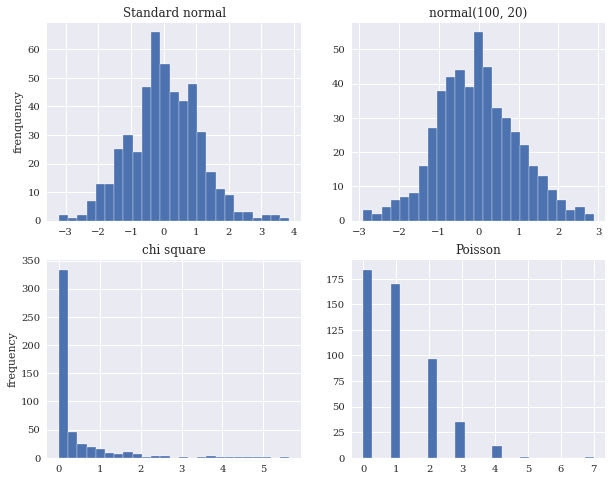

In [10]:
"""
Next plot visualizes random draws from the following distribution.

* Standard normal with mean of 0 and std of 1.
* Normal with mean of 100 and std of 20.
* Chi square with 0.5 degress of freedom.
* Poisson with lambda of 1.

The result is 3 continuos distributions and the discrete one (Poisson)
Poisson is used to simulate the arrival of (rare) extrenal events.
Like a jump or drop of an instrument or exogenic shock
"""
sample_size = 500

rn1 = npr.standard_normal(sample_size) # Standard normally distributed random numbers
rn2 = npr.standard_normal(sample_size) # Nprmally distributed random numbers
rn3 = npr.chisquare(df=0.5, size=sample_size) # Chi-square distributed random numbers
rn4 = npr.poisson(lam=1.0, size=sample_size) # Poisson distributed numbers

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,
                                              figsize=(10,8))

ax1.hist(rn1, bins=25)
ax1.set_title('Standard normal')
ax1.set_ylabel('frenquency')
ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax4.hist(rn4, bins=25)
ax4.set_title('Poisson')




In [11]:
"""
#Simulation

Monte Carlo simulation (MCS) is one of the most important numerical techniques in fianace.
It is flaexible numerical method when it comes to the evalutaion of math expressions.
The valuation of financial derivatives. 
Hundreds of thousands even millions of computaions have to be carried out to come up with a single value estimate.
"""

'\n#Simulation\n\nMonte Carlo simulation (MCS) is one of the most important numerical techniques in fianace.\nIt is flaexible numerical method when it comes to the evalutaion of math expressions.\nThe valuation of financial derivatives. \nHundreds of thousands even millions of computaions have to be carried out to come up with a single value estimate.\n'

In [12]:
"""
# Random Variables 
The Black-Scholes-Merton setup for option pricing.

The variables and parameters have the following meaning:

ST = Index leel at date T
r = Constant riskless short rate
o = Constant volatility(= std of returns) of S
z = Standard normally distributed variable
"""

S0 = 100
r = 0.05
sigma = 0.25
T = 2.0
I = 10000 
ST1 = S0 * np.exp((r - 0.5 * sigma ** 2) * T +
                 sigma * math.sqrt(T) * npr.standard_normal(I))
ST2 = S0 * npr.lognormal((r - 0.5 * sigma ** 2) * T,
                        sigma * math.sqrt(T), size=I)

Text(0, 0.5, 'frequency')

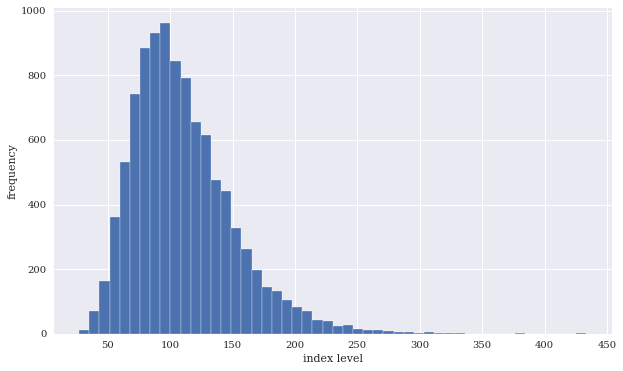

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [14]:
"""
A statistical mements of the sulting distributions.
The scipy.stats subpackage and helper function prove useful
"""
import scipy.stats as scs

def print_stats(a1, a2):
    sta1 = scs.describe(a1)
    sta2 = scs.describe(a2)
    print('%14s %14s %14s' %
    ('statistic', 'data set 1', 'data set 2'))
    print(45 * "-")
    print('%14s %14.3f %14.3f' % ('size', sta1[0], sta2[0]))
    print('%14s %14.3f %14.3f' % ('min', sta1[1][0], sta2[1][0]))
    print('%14s %14.3f %14.3f' % ('max', sta1[1][1], sta2[1][1]))
    print('%14s %14.3f %14.3f' % ('mean', sta1[2], sta2[2]))
    print('%14s %14.3f %14.3f' % ('std', np.sqrt(sta1[3]), np.sqrt(sta2[3])))
    print('%14s %14.3f %14.3f' % ('skew', sta1[4], sta2[4]))
    print('%14s %14.3f %14.3f' % ('kurtosis', sta1[5], sta2[5]))


    
    
    
print_stats(ST1,ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.035         30.474
           max        433.432        368.028
          mean        110.425        110.958
           std         40.553         41.069
          skew          1.132          1.185
      kurtosis          2.287          2.359


Text(0, 0.5, 'frequency')

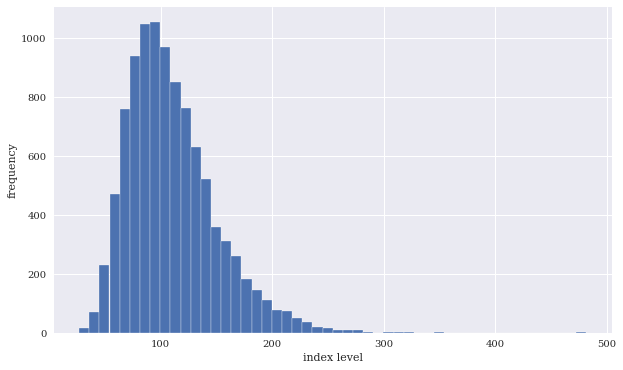

In [15]:
"""
# Stochastic Prosesses 
A stochastic process is a sequence of random variables. in that sense,
one should expect something similar to a sequence of repeated simulations of a random variable when simulating the process.
Draws are typically not independent but rather depend on the results of previos draws.

Stochastic process used in fiance exhibit the Markov property which maily says
(tomorrow's value of the process only depends on todays state of the process not any more.
The process then is also called memoryless

Geometric Brownian motion

The values for the index level are log-normally distributed.
"""
I = 10000 # The number of path to be simulated 
M = 50 # The number of time intervals for the discretizatiom 
dt = T / M # The length of time interval in year fractions
S = np.zeros((M + 1, I)) # The two-simansional adarray object for the index levels
S[0] = S0 # The intial values for the initial point in time t= 0 
for t in range (1, M + 1):
    S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                            sigma * math.sqrt(dt) * npr.standard_normal(I)) # The simulation via semivectorized expression
    # The loop is over the point in the staring at t=1 and ending at t = T

    
    
plt.figure(figsize=(10,6))
plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')

In [16]:
print_stats(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         27.049         30.474
           max        481.442        368.028
          mean        110.481        110.958
           std         40.283         41.069
          skew          1.216          1.185
      kurtosis          3.327          2.359


'\nUsing the dynamic simulatied approach not only allows us to visualize paths as displayed in plot.\nAlos to value options with USA/Nermudad exercise or options whore payoff is path-dependent.\n\n\n\n'

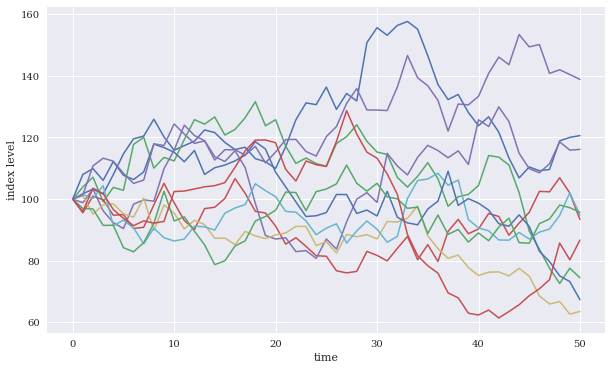

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

"""
Using the dynamic simulatied approach not only allows us to visualize paths as displayed in plot.
Alos to value options with USA/Nermudad exercise or options whore payoff is path-dependent.



"""

In [18]:
"""
Square-root-diffusion 
'Mean-Reverting-Processes' are used to model short rates or volatility processes.

The square-root disffusion has the convenient and realistic characteristic that the values of Xt remain strictly +.
Whe discretzing it by an Euler scheme, negative values cannot be excluded.
The reason why one works with + version of original simulated process. 
In the simulation code, one therefore needs two ndarray objects instead of only one.
"""

x0 = 0.05 # The initial value 
kappa = 3.0  # The mean reversion factor 
theta = 0.02 # The long-term mean value
sigma = 0.1 # The volatility factor
I = 10000 # 
M = 50 
dt = T / M 

def srd_euler():
    xh = np.zeros((M + 1, I))
    x = np.zeros_like(xh)
    xh[0] = x0
    x[0] = x0
    for t in range(1,M +1):
        xh[t] = (xh[t - 1] +
                kappa + (theta - np.maximum(xh[t - 1], 0)) * dt +\
                 sigma * np.sqrt(np.maximum(xh[t - 1], 0)) * math.sqrt(dt)\
                 * npr.standard_normal(I)) # The simulation based on an Euler scheme
    x = np.maximum(xh, 0 )
    return x 
x1 = srd_euler()
        

Text(0, 0.5, 'frequency')

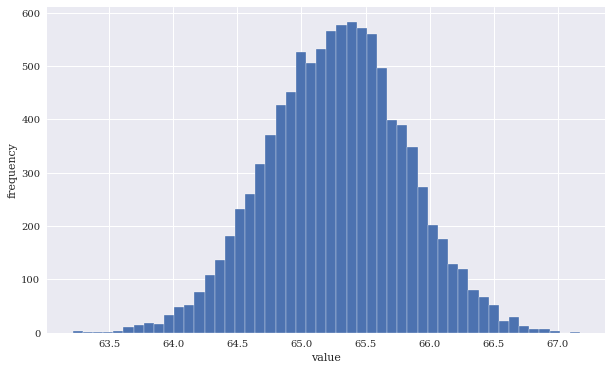

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(x1[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

Text(0, 0.5, 'index level')

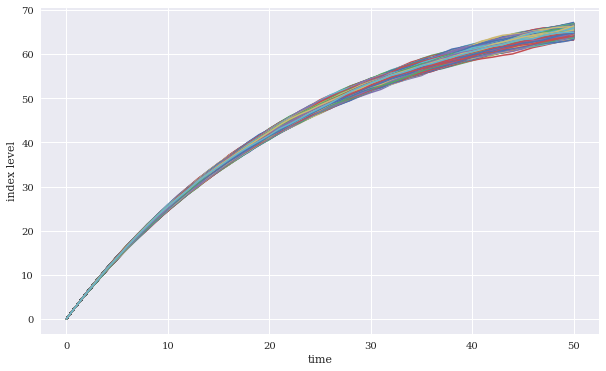

In [20]:

# This plot show the first 10 simulated paths

plt.figure(figsize=(10,6))
plt.plot(x1[:, :-10], lw=1.5)
plt.xlabel('time')
plt.ylabel('index level')

In [21]:
"""
Stochastic Volatility and the leverage effect are stylized facts (empirical) founds in a number of markets.
Another important stylized fact is the existence of jumps in asset prices and volatility.

Given the discretization scheme, consider the numerical parameterization:
"""

S0 = 100
r = 0.05
sigma = 0.2
lamb = 0.75 # The jump intensity
mu = -0.6 # The mean jump size
delta = 0.25 # The jump valatility
rj = lamb * (math.exp(mu + 0.5 * delta ** 2) - 1) # The drift correction

In [22]:
T = 1.0
m = 50
I = 10000
dt = T / M

Text(0, 0.5, 'frequency')

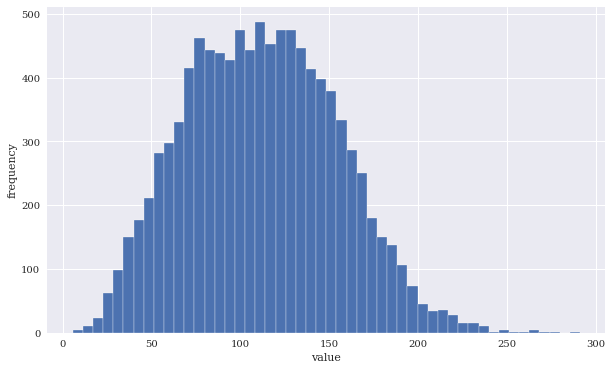

In [23]:
S = np.zeros((M + 1, I))
S[0] = S0
sn1 = npr.standard_normal((M + 1, I)) # Standarard normally distributed random numbers
sn2 = npr.standard_normal((M + 1, I))
poi = npr.poisson(lamb * dt, (M + 1, I)) # Poisson distributed random numbers
for t in range(1, M + 1, 1):
    S[t] = S[t - 1] * (np.exp((r - rj - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn1[t] + (np.exp(mu + delta * sn2[t]) - 1) * poi[t]))
    # ^ Simulation based on the exact Eular scheme.                   
    S[t] = np.maximum(S[t], 0)
plt.figure(figsize=(10, 6))
plt.hist(S[-1], bins=50)
plt.xlabel('value')
plt.ylabel('frequency')

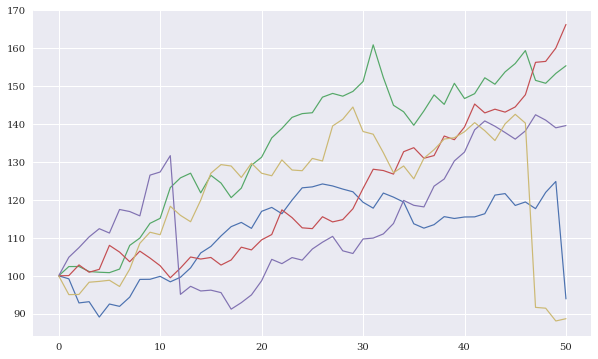

In [24]:
"""
Negative jumps can also be spotted in the first 10 simulated index level paths
"""

plt.figure(figsize=(10, 6))
plt.plot(S[:, :5], lw=1.2)

In [25]:
def gen_sn(M, I, anti_paths=True, no_match=True):
    if anti_paths is True:
        sn = npr.standard_normal((M + 1, int(I / 2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M + 1, I))
    if no_match is True:
        sn = (sn - sn.mean()) / sn.std()
    return sn

In [26]:

def gbm_mcs_amer(K, option='call'):
    ''' Valutaion of USA option in Black - Scholes - Merton
    by Monte Carlo simulation by LSM algo
    
    Parameters
    ========
    K: float 
        (positive) strike of the option
    option: string
        type of the option to be valued ('call', 'put')
        
    Returns
    ========
    C0 = float
        estimated present value of American call option'''
    
    dt = T / M 
    df = math.exp(-r*dt)
    # simulation of index levels
    S = np.zeros((M + 1, I))
    S[0] = S0
    sn = gen_sn(M, I)
    for t  in range(1, M + 1):
        S[t] = S[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * sn[t])
        # case based calculation of payoff
        if option == 'call':
            h = np.maximum(S - K, 0)
        else:
            h = np.maximum(K - S, 0)
        # LSM algo
        V = np.copy(h)
        for t in range(M - 1, 0, -1):
            reg = np.polyfit(S[t], V[t + 1] * df, 7)
            C  = np.polyval(reg, S[t])
            V[t] = np.where(C > h[t], V[t + 1] * df, h[t])
        # MCS estimator
        C0 = df * np.mean(V[1])
        return C0

In [27]:
gbm_mcs_amer(110, option='call')

C:\Users\JBarr\anaconda3\envs\dev\lib\site-packages\numpy\lib\polynomial.py:628: RuntimeWarning: invalid value encountered in true_divide
  lhs /= scale


LinAlgError: SVD did not converge in Linear Least Squares

In [28]:
gbm_mcs_amer(110, option='put')

LinAlgError: SVD did not converge in Linear Least Squares

In [29]:
# Risk Measure
"""
Risk management is another important application of stochastic methods and simulation.

# Values-at-Risk 
One of the most widely ussed risk measure, and much debated one.
Criticized with regards to its limited ability to captpute what is called 'tail risk'.

VaR is a number denoted in currency units indicating a loss that is not exceeded with some confidence level
(probability) over a period of time.

Assume the Black-Scholes-Merton setup and consider the following parameterization and simulation
of index levels at a future date T = 30/365 A perdiod of 30 days.
The estimation of VaR figures requires the simulated absolute porfits and losses
relative to the value of the postion today in a sorted matter frpm the severest loss to the largest profit
"""
S0 = 100
r = 0.05
sigma = 0.25
T = 30/365
I = 10000

ST = S0 * np.exp((r - 0.5 * sigma ** 2 ) * T + sigma * np.sqrt(T) * npr.standard_normal(I))
# Simulates end of project values for the geometric Brownian motion.

Text(0, 0.5, 'frequency')

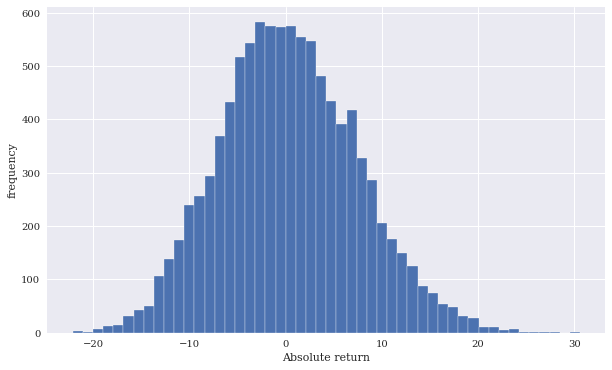

In [30]:
R_gbm = np.sort(ST - S0) # Calculates the absolute profits and losses per simulation run and sorts the values.

plt.figure(figsize=(10,6))
plt.hist(R_gbm, bins=50)
plt.xlabel('Absolute return')
plt.ylabel('frequency')

In [31]:
percs = [0.01, 0.1, 1., 2.5, 5.0, 10.0]
var = scs.scoreatpercentile(R_gbm, percs)
print('16%s %16s' % ('Cofident Level', 'Value-at-Risk'))
print(33 * '-')
for pair in zip(percs,var):
    print("%16.2f %16.3f" % (100 - pair[0], - pair[1]))

16Cofident Level    Value-at-Risk
---------------------------------
           99.99           21.205
           99.90           19.094
           99.00           15.018
           97.50           12.838
           95.00           10.996
           90.00            8.722


In [32]:
"""
# Credit Valuation Adjustments 

Risk measures are the credit value-at-risk (CVaR) and the credit valutaion adjustment 
Roughly speaking CVaR is a measure for the risk resulting from the possibility that
a counterparty might not be able to honor it
These are two main assumptions to be made: 
the probability of default and the (average) loss level.

Again the benchmatk setup of the Black-Scholes-Merton with the parameterization in the following code.

"""
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.
I = 100000

ST = S0 * np.exp((r - 0.5 * sigma ** 2) * T + sigma * np.sqrt(T) * npr.standard_normal(I))
L = 0.5 # Defines the loss level

p = 0.01 # Defines the probability of dafault

D = npr.poisson(p * T, I) # Simulates default events
D = np.where(D > 1, 1, D) # Limits defaults to one such event


In [33]:
math.exp(-r * T) * np.mean(ST) # The discounted average simulated value of the asset at T.


99.84208814663263

In [34]:
CVaR = math.exp(-r * T) * np.mean(L * D * ST) # CVaR as the discounted average of the future losses im the case of a default.
CVaR

0.5111906526344403

In [35]:
S0_CVA = math.exp(-r * T) * np.mean((1 - L * D) * ST)
# Discounted average simulated value of the asset at T, adjusted for the simulated losses from default
S0_CVA

99.33089749399818

In [36]:
S0_adj = S0 - CVaR # Curent price of the asset adjusted by the simulated CVaR
S0_adj

99.48880934736556

In [37]:
"""
# Chapter 13:

Statistics is a vast field, but the tools and results and it provides have become indispensable for fianace. 
The more elaborate and complex statistical models, the more important it is to have high performing computational solutions.

This chapter has four focal points.

'Normality Tests'
A large nurmber of fianncial models, rest on the assumption that returns of securities are normally distibuted.
Therefore, this chapter represents approaches to test a given time series for normality of returns.

'Portfolio Optimization'
MPT can be considered a big successes of statistics in fiannce. 
Starting in the early 1950s could be the first real quantitative model and approach in finance.

'Bayesian Statistics'
On a conceptual level:
Bayesian statistics introduces the notion of beliefs of agents and the updating of beliefs to statistics. 
When it come linear regression, might take the form of having a statistical distribution for regression paremeters 
instead of single point estimates (for the intercept and slope of the regression).
Nowadays, Bayesian methods are widely used in finance, which is why this section illustrates Bayesian methods based on examples.

'Machine Learning'
Machine Learning (Statistical Learning) is based on advanced statistical methods and is considered a subdiscipline of AI

Like statistics itself, machine learning offers a rich set of approaches and models to learn form data sets
and create predictions based on what is learned. Different algo of learning are distinguished,
such as those for supervised learning or unsupervised learning.
The types of problems solved by the algo differ as well, such as estimation or classifiacation.
Examples in this chapter can fall into the supervised learning classification.


# Normality Tests 

The 'normal distribution' can be considered the most important distribution in fianace
and one of the majpr statistical building blocks of financial theory. 
Following cornerstone of fianacial theory rest to a large extent on the assumption that retunrs are normally distributed.

Portfolio theory
When stock returns are normally distributed, optimal portfolio choice can be cast into a setting
where only the (expected) mean return and the variance of the returns (or the volatility) as well as
the covariances between diffrent stocks are relavent for an investment decision (Optimal Portfolio Composition)

Capital asset pricing model
When stock returns are normally distributed, prices of single stocks can be elegantly expressed in linear relationship
to a broad market index; the relationship is generally expressed by a measure of the co-movement of a single stock 
with the markert index called beta or B

Efficient markerts hypothesis
An efficient market is a market where prices reflect all available information,
where all can be defined more narrowly or widely
(as in 'all pubblicly available' information vs. includuing also 'only privately available information')
If this thesis holds true, then stock prices fluctuate randomly and returns are normally distributed.

Option pricing theory 
Brownian motion, is the benchmark model for the modeling of random price movements of financial intruments.
Black-Scholes-Merton option pricing formula uses a geometric Brownian motion
as the model for a stocks random price fluctuations over time, leading to log-normally distributed prices and
normally distributed returns.
"""

"\n# Chapter 13:\n\nStatistics is a vast field, but the tools and results and it provides have become indispensable for fianace. \nThe more elaborate and complex statistical models, the more important it is to have high performing computational solutions.\n\nThis chapter has four focal points.\n\n'Normality Tests'\nA large nurmber of fianncial models, rest on the assumption that returns of securities are normally distibuted.\nTherefore, this chapter represents approaches to test a given time series for normality of returns.\n\n'Portfolio Optimization'\nMPT can be considered a big successes of statistics in fiannce. \nStarting in the early 1950s could be the first real quantitative model and approach in finance.\n\n'Bayesian Statistics'\nOn a conceptual level:\nBayesian statistics introduces the notion of beliefs of agents and the updating of beliefs to statistics. \nWhen it come linear regression, might take the form of having a statistical distribution for regression paremeters \ninst

In [38]:
"""
The following uses the function gen_paths() to generate sample Monte Carlo paths 
for the geometric Brownian motion
"""
def gen_paths(S0, r, sigma, T, M , I):
    dt = T / M
    paths = np.zeros((M + 1, I))
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std() # Matching first and second moment
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt + sigma * math.sqrt(dt) * rand)
        # Vectorized Euler discretization of geometric Brownian motion
    return paths

In [39]:
"""
The simulation as shown here, generating, in combination with the fuction gen_paths()
250,000 paths with 50 time steps each.
Next plot show the first 10 simulated paths:
"""

S0 = 100 # Inilital value for simulated processes
r = 0.05 # Constant short rate
sigma = 0.2 # Constant volatility factor
T = 1.0 # Time horizon in year fractions
I = 250000 # Number of suimulated processes
np.random.seed(1000) # Expected value and average simulated value

In [40]:
paths = gen_paths(S0, r, sigma, T, M, I )

In [41]:
S0 * math.exp(r * T)

105.12710963760242

In [42]:
paths[-1].mean()

105.12645392478755

Text(0, 0.5, 'Index level')

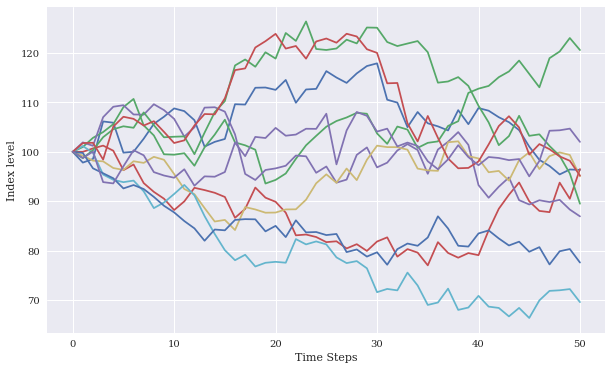

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(paths[:, :10])
plt.xlabel('Time Steps')
plt.ylabel('Index level')

In [44]:
log_returns = np.log(paths[1:] / paths[:-1])

log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [45]:
"""
A statistical mements of the sulting distributions.
The scipy.stats subpackage and helper function prove useful
"""
import scipy.stats as scs

def print_stats(array):
    sta = scs.describe(array)
    print('%14s %15s'  % ('statistics', 'value'))
    print(30 * "-")
    print('%14s %15.5f' % ('size', sta[0]))
    print('%14s %15.5f' % ('min', sta[1][0]))
    print('%14s %15.5f' % ('max', sta[1][1]))
    print('%14s %15.5f' % ('mean', sta[2]))
    print('%14s %15.5f' % ('std', np.sqrt(sta[3])))
    print('%14s %15.5f' % ('skew', sta[4]))
    print('%14s %15.5f' % ('kurtosis', sta[5]))


    
    
    
print_stats(log_returns.flatten())

    statistics           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


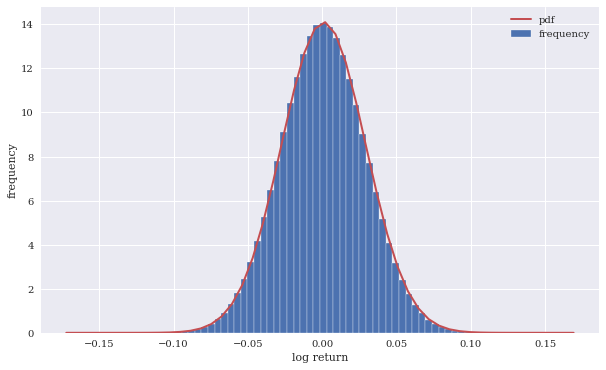

In [46]:
'''
This plot compares the frequency distribution of the simulated log returns with the probability density function (PDF)
of the normal distribution given the parameterizations for r and sigma.
The function used is norm.pdf() from the scipy.stats sub package
'''
plt.figure(figsize=(10, 6))
plt.hist(log_returns.flatten(), bins=70, density=True,
         label='frequency', color='b')
plt.xlabel('log return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r',lw=2.0, label='pdf')
plt.legend()

In [79]:
"""
# Real World Data
This section analyzes four historical fianacial time series, two for technology stocks and to exchange traded funds (ETF):
"""
vix = pd.read_csv('VIX.csv',infer_datetime_format=True, parse_dates=True, index_col=['Date'])
#income.rename(columns={'Report Date':'Date'}, inplace=True)

vix_close = vix[['Close']].round(3)
vix_close.rename(columns={'Close':'vix_close'}, inplace=True)
vix_close.reset_index(inplace=True)
vix_close

,Date,vix_close
0,2010-01-04,20.04
1,2010-01-05,19.35
2,2010-01-06,19.16
3,2010-01-07,19.06
4,2010-01-08,18.13
...,...,...
2248,2018-12-07,23.23
2249,2018-12-10,22.64
2250,2018-12-11,21.76
2251,2018-12-12,21.46


In [80]:
spy = pd.read_csv('SPY.csv',infer_datetime_format=True, parse_dates=True, delimiter=',')
spy_close = spy[['Close']][:2253].round(2)
spy_close.rename(columns={'Close':'spy_close'},inplace=True)
spy_close.reset_index(inplace=True)

In [81]:
dow = pd.read_csv('djia_.csv',infer_datetime_format=True, parse_dates=True, index_col='Date')
dow_closedow_close = dow[['Close']][:2253].round(2)
dow_closedow_close.rename(columns={'Close':'dow_close'},inplace=True)
dow_closedow_close.reset_index(inplace=True)
dow_closedow_close

,Date,dow_close
0,2010-01-04,10583.96
1,2010-01-05,10572.02
2,2010-01-06,10573.68
3,2010-01-07,10606.86
4,2010-01-08,10618.19
...,...,...
2248,2018-12-07,24388.95
2249,2018-12-10,24423.26
2250,2018-12-11,24370.24
2251,2018-12-12,24527.27


In [124]:
spy = pd.read_csv('SPY.csv',infer_datetime_format=True, parse_dates=True, delimiter=',')

spy_close.rename(columns={'Close':'spy_close'},inplace=True)
spy_close.reset_index(inplace=True)

In [134]:
spfive_closefull = pd.read_csv('sp500_closefull.csv',
                               infer_datetime_format=True,
                               parse_dates=True,
                               index_col=['Date'])

aapl = spfive_closefull[['AAPL']]
AME = spfive_closefull[['AME']]
amt = spfive_closefull[['AMT']]
AXP = spfive_closefull[['AXP']]

In [135]:
aapl_close = aapl[['AAPL']][:2253].round(2)
AXP_close = AXP[['AXP']][:2253].round(2)

AME_close = AME[['AME']][:2253].round(2)
amt_close = amt[['AMT']][:2253].round(2)

In [150]:
data = pd.concat([aapl_close, AXP_close], axis=1)

In [151]:
data_foreal = pd.concat([amt_close, AME_close], axis=1)

In [ ]:
real_data  = pd.concat([data, data_foreal], axis=1)


<AxesSubplot:xlabel='Date'>

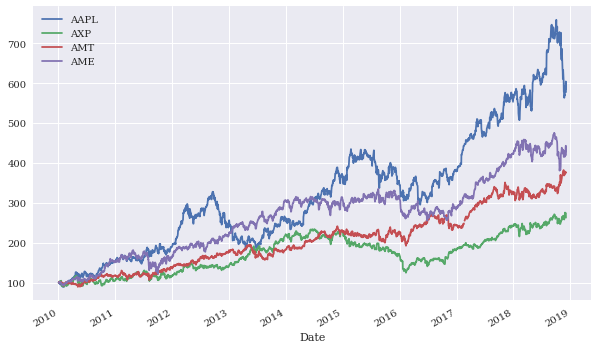

In [164]:
(real_data / real_data.iloc[0] * 100).plot(figsize=(10, 6))

,AAPL,AXP,AMT,AME
Date,,,,
2018-11-29,-0.007712,-0.014095,0.004435,-0.009650
2018-11-30,-0.005417,0.008588,0.010819,0.002864
2018-12-03,0.034346,0.000801,-0.008609,0.035584
2018-12-04,-0.044986,-0.042916,0.002450,-0.054140
2018-12-05,NaN,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'AAPL'}>,
        <AxesSubplot:title={'center':'AXP'}>],
       [<AxesSubplot:title={'center':'AMT'}>,
        <AxesSubplot:title={'center':'AME'}>]], dtype=object)

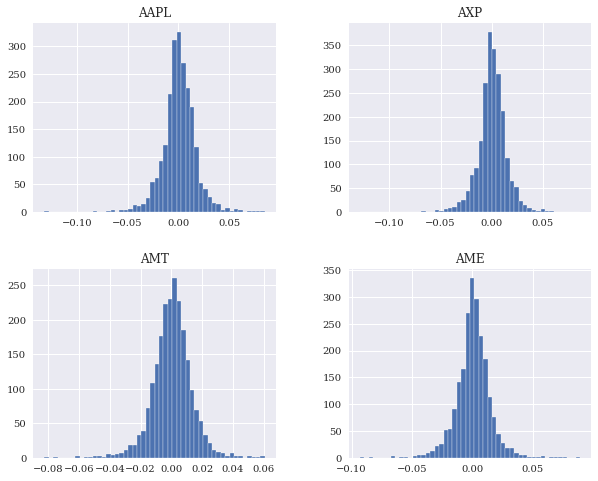

In [171]:
# Shows the log returns of financial instrument as histogram

log_returns = np.log(real_data / real_data.shift(1))
display(log_returns.tail())
log_returns.hist(bins=50, figsize=(10, 8))

In [173]:
# The different statistics for the time series data.

for sym in symbols:
    print('\nResults for symbol {}'.format(sym))
    print(30 * '-')
    log_data = np.array(log_returns[sym].dropna())
    print_stats(log_data)

NameError: name 'symbols' is not defined

In [ ]:
"""
# Portfolio Optimization 
Modern or mean-varia

"""